In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,metrics,model_selection,svm,preprocessing
from mlxtend.plotting import plot_confusion_matrix

In [2]:
x,y=datasets.load_breast_cancer(return_X_y=True)

In [3]:
x.shape,y.shape

((569, 30), (569,))

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
x_normalizer=preprocessing.StandardScaler()
new_x=x_normalizer.fit_transform(x)
#y don’t need normalizer because its 0 or 1

In [6]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(new_x,y,test_size=0.3,random_state=42,stratify=y) #30% for testing

In [7]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [8]:
#SVM
svm_model=svm.SVC(kernel='linear',C=0.5)

In [9]:
svm_model.fit(x_train,y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
pred=svm_model.predict(x_test) #prediction the model

In [11]:
print(f'precision score is: {metrics.precision_score(y_test,pred)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y_test,pred)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y_test,pred)}')                         #f1=2*precision*recall/precision+recall
print(f'Confusion Matrix is: {metrics.confusion_matrix(y_test,pred)}')         #    TP  FP
                                                                               #    FN  TN

precision score is: 0.9814814814814815
recall score is: 0.9906542056074766
f1 score is: 0.986046511627907
mean squared error is: 0.017543859649122806
accuracy score is: 0.9824561403508771
Confusion Matrix is: [[ 62   2]
 [  1 106]]


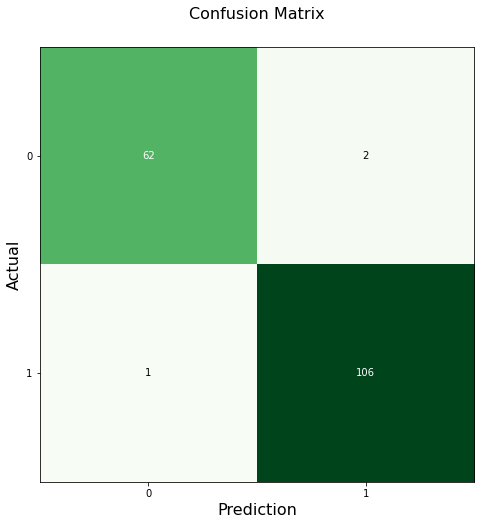

In [30]:
confusion_matrix=metrics.confusion_matrix(y_test,pred)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Greens,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()